## Introduction 
### In this project, I focus on analyzing The Movie Database (TMDB),The overall objective of this analysis is to provide in-depth insight into this dataset,This analysis allows us to draw a comprehensive picture in general about the given dataset, such as the genres that have the highest number of movies to understand the trend in the market, and to answer some questions such as:

1.	What kinds of properties are associated with movies that have high revenues?
2.	How are the revenue level changes over years?
3.	How are the Budget  level changes over years?
4.	Who are the actors with the most movies?
5.	Which directors with the most movies?
6.	Which genres are most popular from year to year?
7.	Which Production companies have the highest number of movies?
8.	How does the Runtime change from year to year?
9.	How long is the average Runtime?
10.	Which Year that has the most number of movies?

In [1]:
#Laibraries that I will use it in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

Here I want to have a general idea of what the data looks like

In [2]:
# Read the CSV File Using Pandas read_csv function
tmdb_dataset = pd.read_csv('tmdb-movies.csv')
#Print the first 5 rows of the dataset
tmdb_dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Here I want to get an overview of the data

In [3]:
#Print the summary of the dataset including the columns names , data type and count of non-null values for each coulmn
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#Print how many rows and columns in the dataset 'befor the data cleaning'
tmdb_dataset.shape

(10866, 21)

In [5]:
#Print the data type for each column
tmdb_dataset.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

I want to know if there is a duplicated values 

In [6]:
#Print how many duplicated value in the dataset
sum(tmdb_dataset.duplicated())

1

In [7]:
#Check for null values in each column
tmdb_dataset.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#Check for the number of unique values in this dataset
tmdb_dataset.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
#Show some statistics related to the data frame columns
#Here I obtained zero's in unique values like budget , revenue and runtime
#Also in budget_adj , revenue_adj but i will not use either of them
tmdb_dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Here after i detemine that I will not use these columns I decided to write them off

In [10]:
#Drop some columns that I will not use it in this Analysis
tmdb_dataset.drop(['imdb_id','homepage','tagline','budget_adj','revenue_adj','release_date','overview'], axis=1, inplace=True)
tmdb_dataset.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015


In [11]:
#Print the data shape after drop some columns
tmdb_dataset.shape

(10866, 14)

In [12]:
#Drope duplicated values
tmdb_dataset.drop_duplicates(inplace = True)
#Check if it droped
sum(tmdb_dataset.duplicated())

0

In [13]:
#Drope every null value in this dataset
tmdb_dataset.dropna(inplace=True)

In [14]:
#Check that there is no null values
tmdb_dataset.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
keywords                False
runtime                 False
genres                  False
production_companies    False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [15]:
#Print information about the dataset after drop duplecates and null value 
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8666 non-null   int64  
 1   popularity            8666 non-null   float64
 2   budget                8666 non-null   int64  
 3   revenue               8666 non-null   int64  
 4   original_title        8666 non-null   object 
 5   cast                  8666 non-null   object 
 6   director              8666 non-null   object 
 7   keywords              8666 non-null   object 
 8   runtime               8666 non-null   int64  
 9   genres                8666 non-null   object 
 10  production_companies  8666 non-null   object 
 11  vote_count            8666 non-null   int64  
 12  vote_average          8666 non-null   float64
 13  release_year          8666 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1015.5+ KB


In [16]:
#Check the data shape after drop null and duplicated values
tmdb_dataset.shape

(8666, 14)

In [17]:
#This function to Check for zero's in unique columns
#I will use this function for 'budget' , 'revenue' , 'runtime' columns
def Check_Zero(x):
    Col_with_zero =tmdb_dataset[x] == 0    
    return  Col_with_zero
#this function will return true if the row contain zero value and false if it not contain zero 

I want to know how much-observed value is zero in Budget column

In [18]:
#I will use sum() to know total number of zero's in budget column
#This Code will return the total number of zero's in budget column
Check_Zero('budget').sum()

3940

I want to know how much-observed value is zero in Revenue column

In [19]:
#I will use sum() to know total number of zero's in revenue column
#This Code will return the total number of zero's in revenue column
Check_Zero('revenue').sum()

4130

I want to know how much-observed value is zero in runtime column

In [20]:
#I will use sum() to know total number of zero's in runtime column
#This Code will return the total number of zero's in runtime column
Check_Zero('runtime').sum()

7

Here I want replace the zero with nan to drop it

In [21]:
#This function to replace zero's with nan 
#I will use this function for 'budget' , 'revenue' , 'runtime' columns
def replaceToNan(x):
    convertToNan = tmdb_dataset[x].replace(0, np.nan, inplace=True)
    return convertToNan
#this function will return nan value in each cell that contain zero

In [22]:
#Apply reolaceNan function to each of following columns 'budget' , 'revenue' , 'runtime'
replaceToNan('budget')
replaceToNan('revenue')
replaceToNan('runtime')

In [23]:
#Drop nan values that I created in the previous fuction
tmdb_dataset.dropna(inplace=True)

In [24]:
#Check that there is no null values
tmdb_dataset.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
keywords                False
runtime                 False
genres                  False
production_companies    False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [25]:
#Print information about the dataset after the cleaning it  
tmdb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3677 non-null   int64  
 1   popularity            3677 non-null   float64
 2   budget                3677 non-null   float64
 3   revenue               3677 non-null   float64
 4   original_title        3677 non-null   object 
 5   cast                  3677 non-null   object 
 6   director              3677 non-null   object 
 7   keywords              3677 non-null   object 
 8   runtime               3677 non-null   float64
 9   genres                3677 non-null   object 
 10  production_companies  3677 non-null   object 
 11  vote_count            3677 non-null   int64  
 12  vote_average          3677 non-null   float64
 13  release_year          3677 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 430.9+ KB


In [26]:
#Last check the number of columns and rows after the final cleaning has been done
tmdb_dataset.shape

(3677, 14)

I decided to use correlation at first to see how strong the relationship between numerical variables is?
# 1. What kinds of properties are associated with movies that have high revenues?


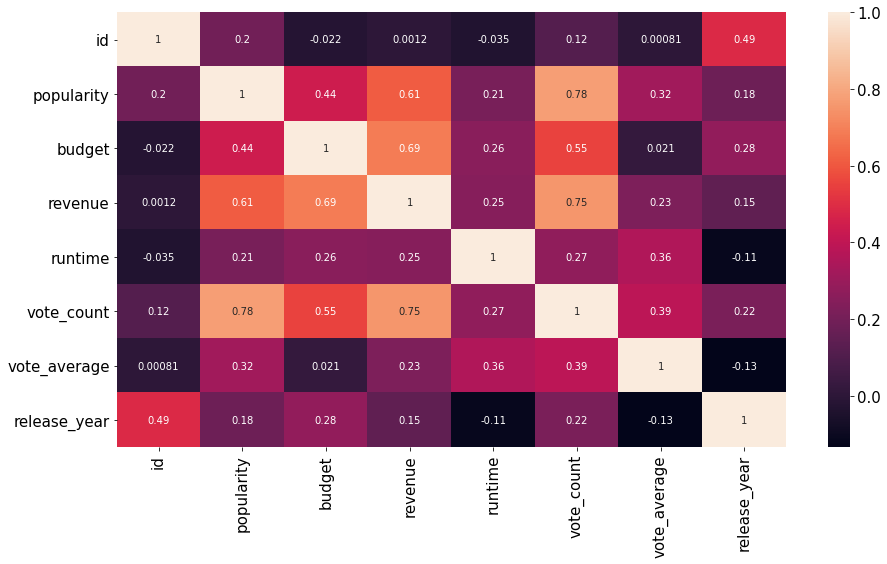

In [27]:
#Reference number 1
#Use Correlation to Check the relationship between the numerical variables
corr = tmdb_dataset.corr()
sns.heatmap(corr, annot=True)
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 8)
plt.show()

# Through this map, I noticed a very strong relationship between Revenue and Budget , Revenue and vote_count
# and there is a strong relationship between Revenue and vote_average , Revenue and Runtime

Text(0, 0.5, 'Budget')

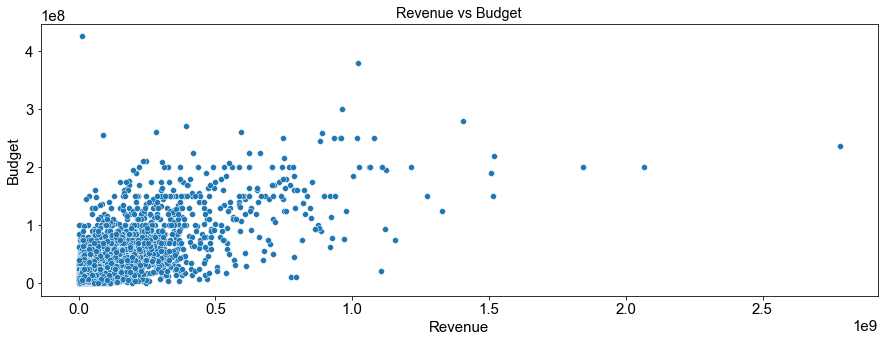

In [28]:
#All the scatter plots and its design Reference number 2 , 3 , 4 and 6
#This scatter plot to show the relation between 'revenue' and 'budget' 
sns.scatterplot(data=tmdb_dataset, x="revenue", y="budget").set_title('Revenue vs Budget' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5) 
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Budget', fontsize=15)

 Correlation between Revenue and Budget = 0.69 it is a very strong relationship which means the Movie with a high Budget receives high Revenue.

Text(0, 0.5, 'Runtime')

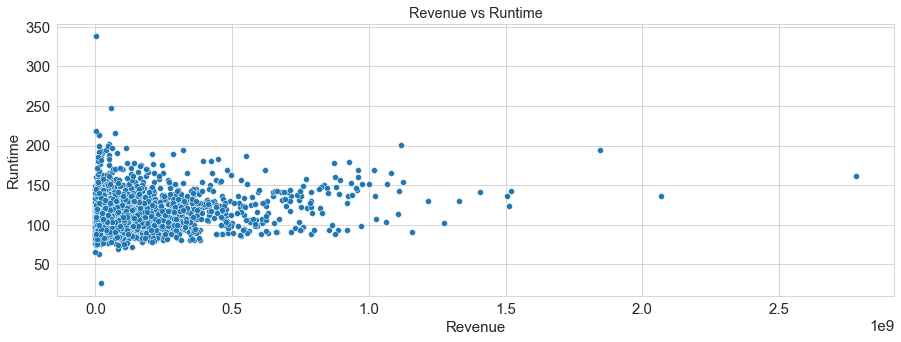

In [29]:
#This scatter plot to show the relation between 'revenue' and 'runtime' 
sns.scatterplot(data=tmdb_dataset, x="revenue", y="runtime").set_title('Revenue vs Runtime' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Runtime', fontsize=15)

The correlation between Revenue and Runtime = 0.25 is a strong relationship but I can conclude from the scatter plot that the variables are not related to each other.

Text(0, 0.5, 'Popularity')

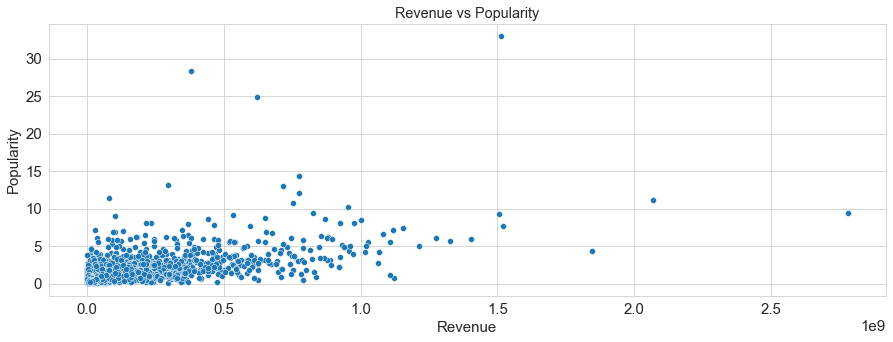

In [30]:
#This scatter plot to show the relation between 'revenue' and 'popularity' 
sns.scatterplot(data=tmdb_dataset, x="revenue", y="popularity").set_title('Revenue vs Popularity' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Popularity', fontsize=15)

Correlation between Revenue and Popularity = 0.61 it is a very strong relationship which means the movie with high Popularity tends to bring high Revenue.

Text(0, 0.5, 'Vote_Count')

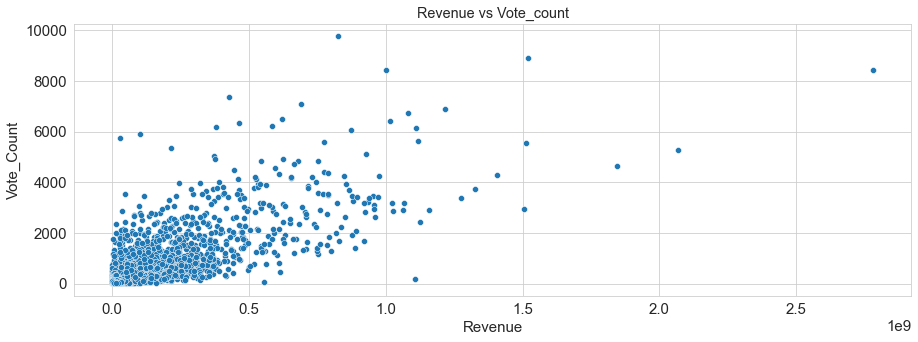

In [31]:
#This scatter plot to show the relation between 'revenue' and 'vote_count' 
sns.scatterplot(data=tmdb_dataset, x="revenue", y="vote_count").set_title('Revenue vs Vote_count' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Vote_Count', fontsize=15)

Correlation between Revenue and Popularity = 0.75 it is a very strong relationship which means the movie with a high vote count tend to bring high Revenue.

Text(0, 0.5, 'Vote_Average')

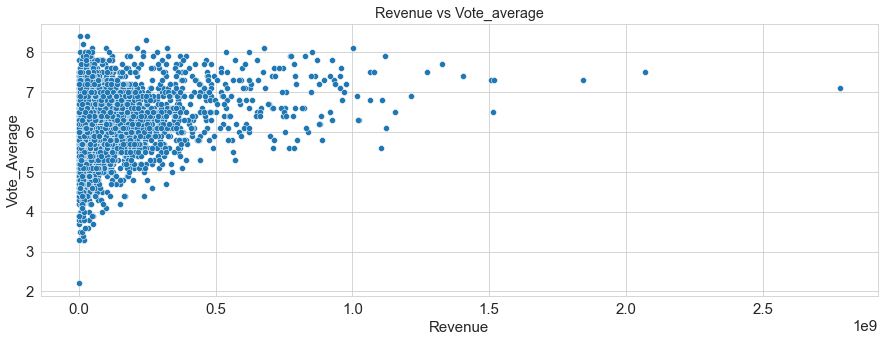

In [32]:
#This scatter plot to show the relation between 'revenue' and 'vote_count' 
sns.scatterplot(data=tmdb_dataset, x="revenue", y="vote_average").set_title('Revenue vs Vote_average' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Vote_Average', fontsize=15)

The correlation between Revenue and Runtime = 0.23 it is a strong relationship but I can conclude from the scatter plot that the variables are not related to each other.

In [33]:
#This equation used to calculate the Profit 
tmdb_dataset['Profit'] = tmdb_dataset['revenue'] - tmdb_dataset['budget']

# 2. How are the revenue level changes over years?

Text(0, 0.5, 'Profit')

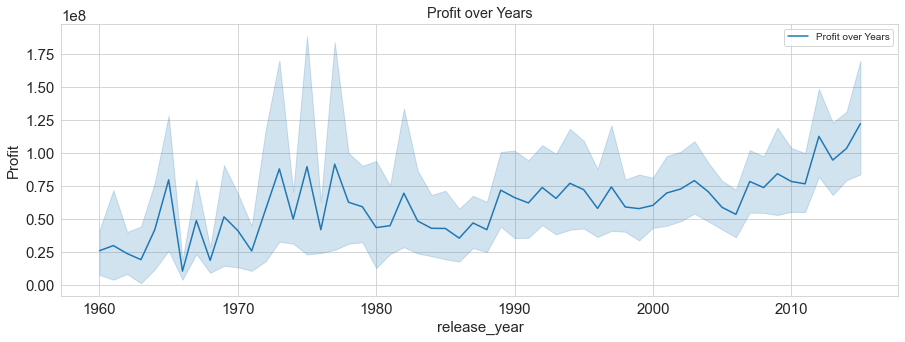

In [34]:
#All line plot reference number 5 , 6 , 3 , 4 
#This line chart to show profit over years
sns.lineplot( x = 'release_year',  y = 'Profit',  data = tmdb_dataset,  label = 'Profit over Years').set_title('Profit over Years' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
plt.xlabel('release_year', fontsize=15)
plt.ylabel('Profit', fontsize=15)

Through the line chart, I conclude that the Revenue increases over the years

# 3. How are the Budget  level changes over years?

Text(0, 0.5, 'Budget')

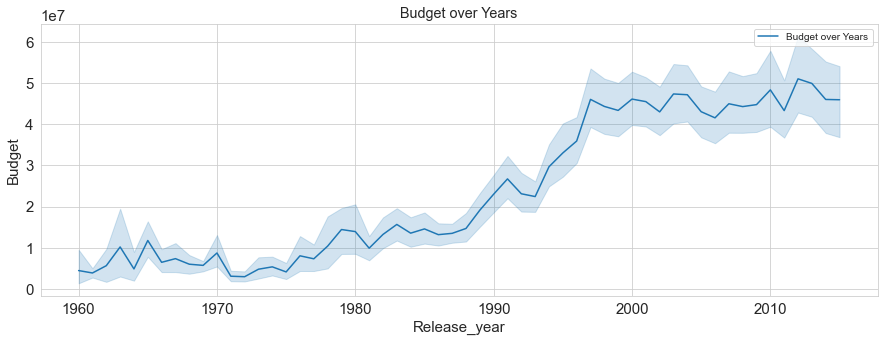

In [35]:
#This line chart to show budget over years
sns.lineplot( x = 'release_year',  y = 'budget',  data = tmdb_dataset,  label = 'Budget over Years').set_title('Budget over Years' , fontsize='x-large')
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
plt.xlabel('Release_year', fontsize=15)
plt.ylabel('Budget', fontsize=15)

Through the line chart, I conclude that the Budget increases over the years we conclude this earlier in the correlation map, there is a direct relationship between the revenue and the Budget

In [36]:
#This function will split the string in 'cast' , 'director' , 'genres' , 'production_companies' columns
#Here just split it and count it with out put it in list
#reference number 7 
def separate_col(column):
    data_after_split = pd.Series(tmdb_dataset[column].str.cat(sep = '|').split('|'))
    count_values = data_after_split.value_counts(ascending=False)
    return  count_values 
#This function will return count of how many times the name of an actor repeates
#This function will return count of how many times the name of an directors repeates
#This function will return count of how many times genres repeates
#This function will return count of how many times the production company repeates

I want to split the column that contains '|' in it such as genres, director, etc...

In [37]:
separate_col('genres')

Drama              1666
Comedy             1280
Thriller           1159
Action             1043
Adventure           725
Romance             628
Crime               628
Science Fiction     510
Horror              445
Family              403
Fantasy             385
Mystery             337
Animation           195
History             125
Music               125
War                 116
Western              51
Documentary          26
Foreign               7
TV Movie              1
dtype: int64

# 4.	Who are the actors with the most movies?

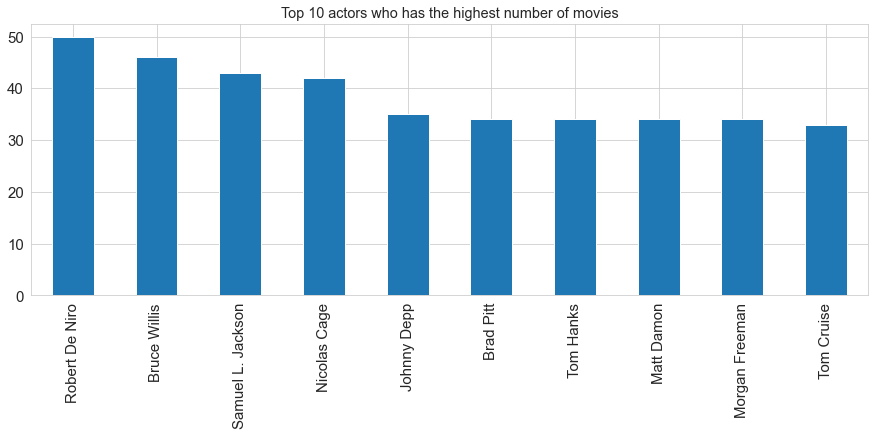

In [38]:
#All bar plot reference number 9
#Draw bar chart for top 10 Actor with high number of movies
separate_col('cast').iloc[:10].plot.bar().set_title('Top 10 actors who has the highest number of movies' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)

In this Chart, I extracted the data of the top 10 Actors who have the highest number of movies
and based on this data the one with most movies was ' Robert De Niro '

# 5.	Which directors with the most movies?

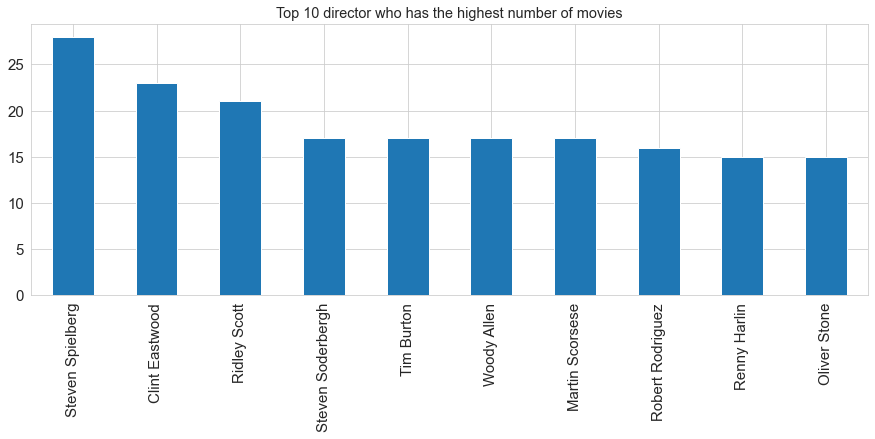

In [39]:
#Draw bar chart for top 10 Director with high number of movies
separate_col('director').iloc[:10].plot.bar().set_title('Top 10 director who has the highest number of movies' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)

In this Chart, I extracted the data of the top 10 directors who  have the highest number of movies
and the director with most movies was ' Steven Spielberg '

# 6.	Which genres are most popular from year to year?

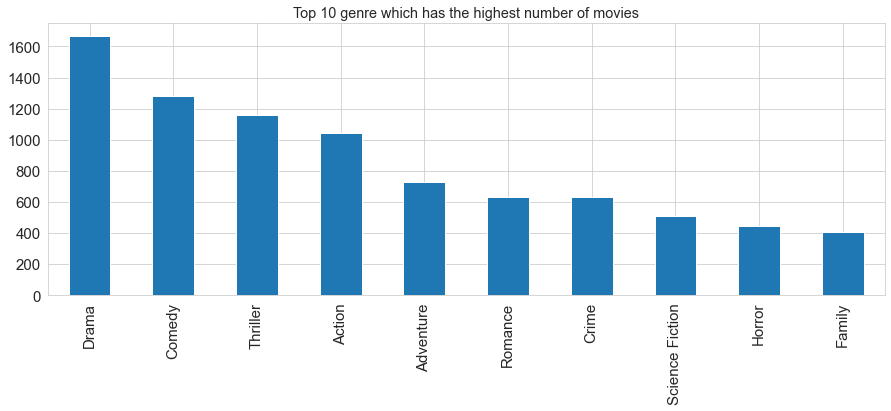

In [40]:
#Draw bar chart for top 10 genres with high number of movies
separate_col('genres').iloc[:10].plot.bar().set_title('Top 10 genre which has the highest number of movies' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)

In this Chart, I extracted the data of the top 10 Genres which have the highest number of movies
Drama genres were the genre with the most number of movies

# 7. Which Production companies have the highest number of movies?

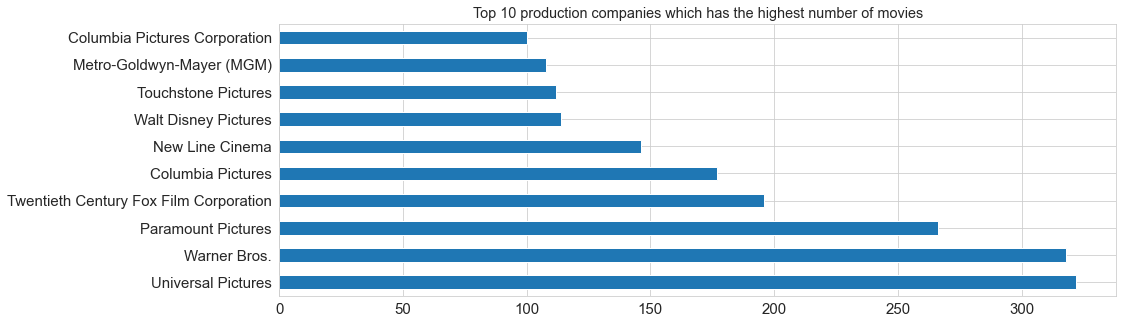

In [41]:
#Draw bar chart for top 10 Production Companies with high number of movies
separate_col('production_companies').iloc[:10].plot.barh().set_title('Top 10 production companies which has the highest number of movies' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)

In this Chart, I extracted the data of the top 10 Production companies which have the highest number of movies
' Columbia Pictures Corporation ' was the production company with the highest number of movies

# 8. How does the Runtime change from year to year?

Text(0, 0.5, 'budget')

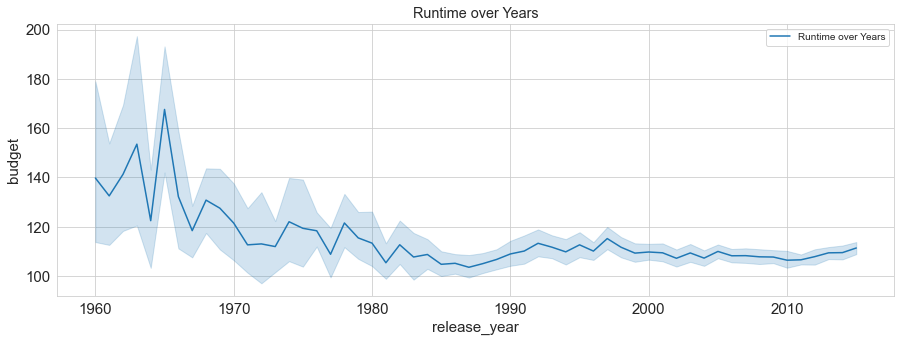

In [42]:
#This line chart to show how the runtime change from year to year over 
sns.lineplot( x = 'release_year',  y = 'runtime',  data = tmdb_dataset,  label = 'Runtime over Years').set_title('Runtime over Years' , fontsize='x-large')
#Use this code to define the boundaries of the chart
plt.gcf().set_size_inches(15 , 5)
#Use this code to define the white color as the background of the chart
sns.set_style('whitegrid')
#Use this code to change the x and y lable size
plt.xlabel('release_year', fontsize=15)
plt.ylabel('budget', fontsize=15)

Referring to the Line Chart, I can conclude that the Runtime decreases over the years

# 9. How long is the average Runtime?

I want to know the Average runtime 

In [43]:
#This code calculate the average of runtime
x = tmdb_dataset['runtime'].mean()
x

109.56132716888769

From this simple code I can conclude that the Average Runtime = 109 minutes 

# 10. Which Year that has the most number of movies?

Text(0.5, 1.0, 'Number of Movies over Years')

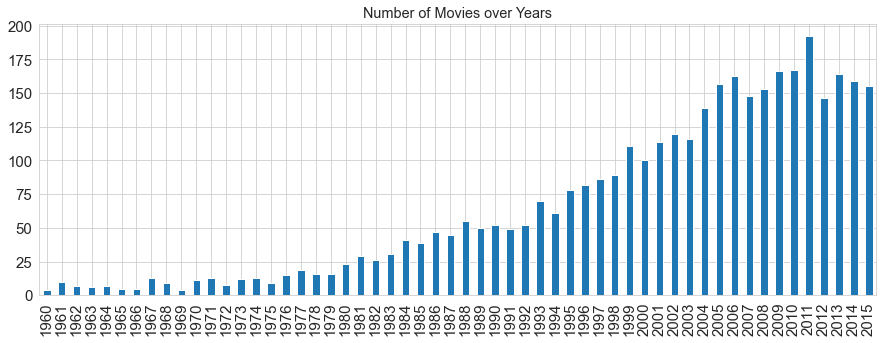

In [44]:
#This bar chart to show the total number of movies in each year from 1960 - 2015 
tmdb_dataset["release_year"].value_counts().sort_index().plot.bar(figsize = (15,5)).set_title('Number of Movies over Years' , fontsize='x-large')

2011 was the year with most movies

# conclusion 

•	There is a high correlation between Revenue and Budget = 0.69

•	The popularity of the movie results in more revenue

•	The high vote count results in more revenue

•	The year with the highest number of movies was 2011

•	The movies Runtime decreases over the years

•	The revenue increases over the years so the film industry is profitable


# Limitation

•	The results of the analysis affected because of  Missing values in the dataset

•	there is a lot of zero values in the budget, revenue, and Runtime columns and thousands of rows was deleted
     I dropped these columns so that affect the                results

•	Vote_average and popularity columns need to be explained in details like the criteria that they use to calculate them

•	The currency must be specified in budget and revenue columns
